In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
import pandas as pd
import numpy as np


In [2]:
#survival:存歿 離散
#pclass:購票分級 離散
#sex:性別 離散
#Name 離散
#SibSp:鐵達尼號上的兄弟姊妹/配偶數量 離散
#parch:鐵達尼號上的雙親/子女數量 離散
#Ticket:票根號碼 離散
#Cabin:船艙編號 離散
#Embarked:登船港口 離散
#Age  連續
#Fare:票價 連續


In [3]:
#導入模型，設定Passengerld(乘客ID)為index
mater_df = pd.read_csv("./titanic/train.csv")
#建立工作用的部分，用copy複製原先的df
work_df = mater_df.copy()
#check 5 row，ues head()
work_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#DataFrame的簡要、摘要
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#DataFrame的空值
work_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## DataFrame
print("Age的最小值有0.42，Fare有0")
work_df.describe()


Age的最小值有0.42，Fare有0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#將SibSp\Parch合併成 Family
work_df["Family"] = work_df["SibSp"]+work_df["Parch"]
work_df.drop(columns=["SibSp","Parch","PassengerId","Ticket","Name"],inplace=True)

In [8]:
work_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,0
887,1,1,female,19.0,30.0000,B42,S,0
888,0,3,female,NaN,23.4500,NaN,S,3
889,1,1,male,26.0,30.0000,C148,C,0


In [9]:
#Cabin:船艙編號 離散
work_Cabin=work_df.copy()
Cabin_number = len(work_df["Cabin"].unique())
print(f"共有{Cabin_number}個船艙編號")

共有148個船艙編號


In [10]:
#減少編號，同英文字母的代表在同一層甲板
#1.填入空值
work_Cabin["Cabin"].fillna(method="bfill",inplace=True)#由後往前填

In [11]:
#2.減少類別
work_Cabin["Cabin"]=work_Cabin["Cabin"].map(lambda x : str(x)[0])
work_df["Cabin"] = work_Cabin["Cabin"]
work_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,C,S,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,C,S,0
3,1,1,female,35.0,53.1000,C,S,1
4,0,3,male,35.0,8.0500,E,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,B,S,0
887,1,1,female,19.0,30.0000,B,S,0
888,0,3,female,NaN,23.4500,C,S,3
889,1,1,male,26.0,30.0000,C,C,0


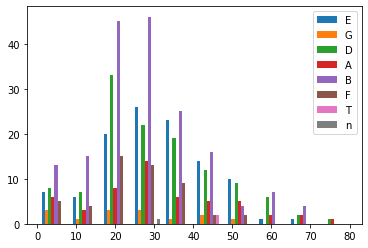

In [12]:
#船艙編號 VS AGE
plt.hist([work_df[work_df["Cabin"]==i]["Age"] for i in work_df["Cabin"].unique()[1:]],label=work_df["Cabin"].unique()[1:])
plt.legend()

In [13]:
work_Cabin["Cabin"]=work_Cabin["Cabin"].fillna(method="bfill")
pd.crosstab(work_Cabin["Survived"],work_Cabin["Cabin"])

Cabin,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,40,124,151,100,80,40,12,1,1
1,24,79,98,55,56,23,6,1,0


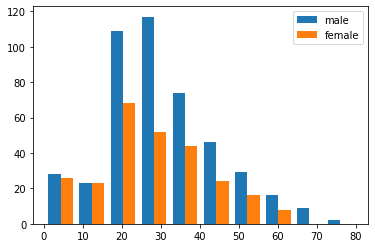

In [14]:
#看關係 性別跟年齡

plt.hist([work_df[work_df['Sex']=='male']['Age'],work_df[work_df['Sex']=='female']['Age']] , label = ['male','female'])
plt.legend()

In [15]:
work_df.groupby("Sex")["Survived"].agg(np.mean).reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex       female  male
Survived              
0             81   468
1            233   109


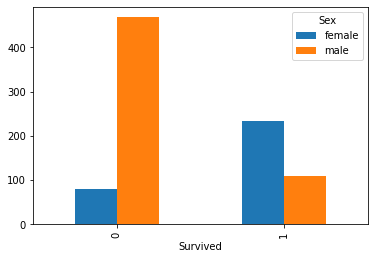

In [16]:
pd.crosstab(work_df["Survived"],work_df["Sex"]).plot.bar()
print(pd.crosstab(work_df["Survived"],work_df["Sex"]))

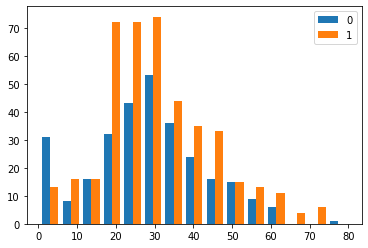

In [17]:
#年齡跟存活
plt.hist([work_df[work_df["Survived"]==1]["Age"],work_df[work_df["Survived"]==0]["Age"]] ,label=["0","1"],bins=15)
plt.legend()

'第三等的人死的較多'

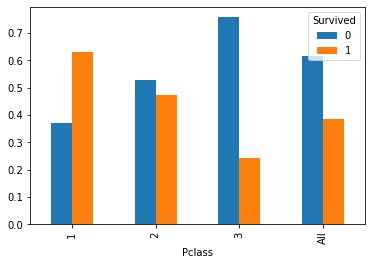

In [18]:
#等級跟Survived
pd.crosstab([work_df["Pclass"]],work_df["Survived"],normalize="index",margins=True).plot.bar()
"""第三等的人死的較多"""

'錢少的人是最多的，錢多的活著都比錢少的人較多'

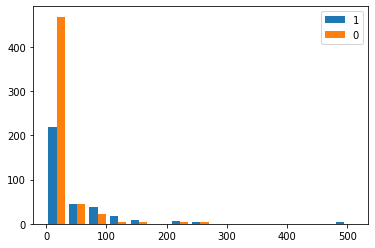

In [46]:
#船票、Survived
plt.hist([work_df[work_df["Survived"]==1]["Fare"],work_df[work_df["Survived"]==0]["Fare"]] ,bins=15 ,label=[1,0])
plt.legend()
"""錢少的人是最多的，錢多的活著都比錢少的人較多"""

'可以看出活得通常付的錢比較多'

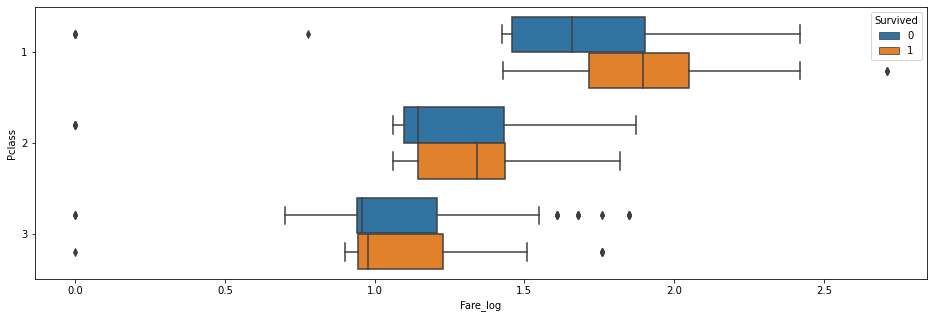

In [60]:
work_df["Fare_log"] = (work_df["Fare"]+1).apply(lambda x : np.log10(x) if  x >0 else 0)#使用log可以解決傾斜、畫圖更好看的問題
plt.figure(figsize=(16,5))
sns.boxplot(data=work_df,x="Fare_log" , y="Pclass" ,hue="Survived",orient="h")
"""可以看出活得通常付的錢比較多"""

In [66]:
print("在各個艙等下，活得人＄都付的叫多")
pd.pivot_table(work_df,index="Pclass",columns="Survived" ,values="Fare",aggfunc=np.median)


在各個艙等下，活得人＄都付的叫多


Survived,0,1
Pclass,,
1,44.75,77.9583
2,13.00,21.0000
3,8.05,8.5167


In [68]:
pd.crosstab(work_df["Pclass"],work_df["Survived"],normalize=True)

Survived,0,1
Pclass,,
1,0.089787,0.152637
2,0.108866,0.097643
3,0.417508,0.133558


'基本都差不多'

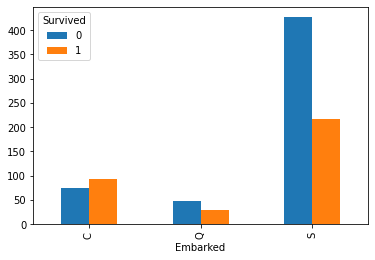

In [20]:
#登船口\Survived
pd.crosstab(work_df["Embarked"],work_df["Survived"]).plot.bar()
"""基本都差不多"""

<AxesSubplot:xlabel='Cabin'>

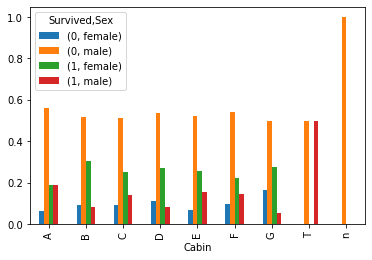

In [21]:
pd.crosstab(work_df["Cabin"],[work_df["Survived"],work_df["Sex"]],normalize='index').plot.bar()

<AxesSubplot:xlabel='Cabin'>

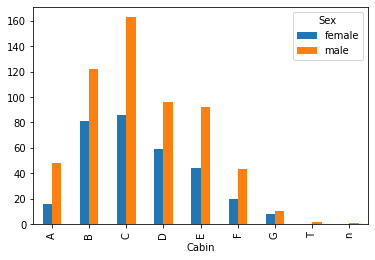

In [22]:
pd.crosstab(work_df["Cabin"],work_df["Sex"]).plot.bar()

<AxesSubplot:xlabel='Pclass'>

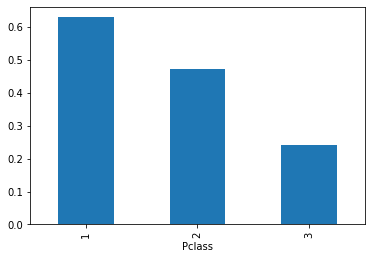

In [23]:
work_df.groupby("Pclass")["Survived"].agg("mean").plot.bar()

<AxesSubplot:xlabel='Pclass'>

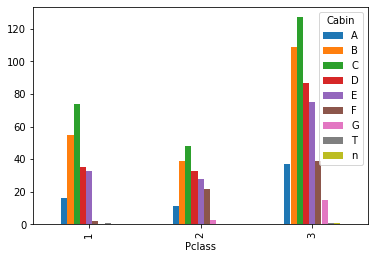

In [24]:
pd.crosstab(work_df["Pclass"],work_df["Cabin"]).plot.bar()

In [25]:
#對Age作補值 連續 ，使用KNN補值
#1.檢測相關性
#1.1區分離散ＯＲ連續

print(work_df.columns)
work_df.info()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [26]:
num_features=["Fare"] #連續
cat_features=["Sex","Family","Pclass",'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T']#離散
work_Age=work_df.copy()

In [27]:
work_Age["Sex"]=work_Age["Sex"].replace({"female":1,"male":0})

In [28]:
Embarked_1=pd.get_dummies(work_Age[["Embarked"]])#onehot
Cabin_1=pd.get_dummies(work_Age[["Cabin"]])#onehot
Age_df=pd.concat([work_Age,Embarked_1,Cabin_1] ,axis=1)
Age_df.dropna(inplace=True)

0.09314251789411519
無線性相關


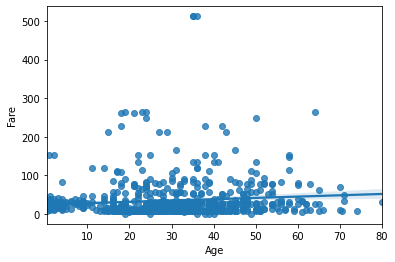

In [29]:
#Age 離散 VS 離散
sns.regplot(x="Age",y="Fare",data = Age_df)
corr,_=stats.pearsonr(Age_df['Age'], Age_df['Fare'])
print(corr)
print("無線性相關")

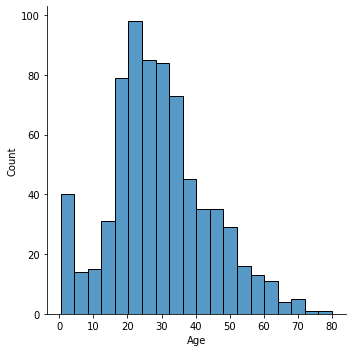

In [30]:
sns.displot(work_df.Age)

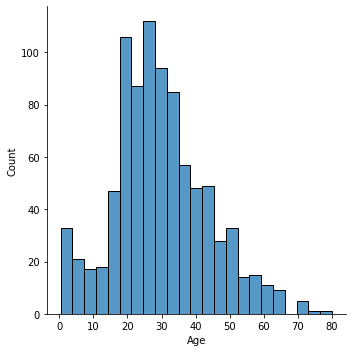

In [31]:
sns.displot(work_df.Age.interpolate())

In [32]:
work_df.Age.interpolate()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [33]:
#使用KNN做補值
#1.轉換元素成num
Age_df2=pd.concat([work_Age,Embarked_1,Cabin_1] ,axis=1)
Age_df2.drop(columns=["Cabin","Embarked"],inplace=True)

In [34]:
Age_df2.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Family          0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Cabin_n         0
dtype: int64

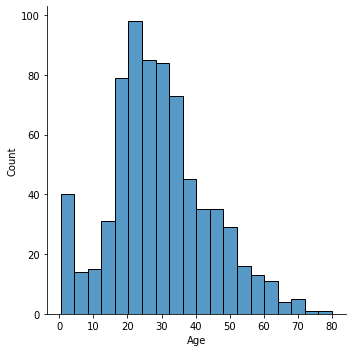

In [35]:
num=1 #選取特徵的選擇
from sklearn.impute import KNNImputer
knnI = KNNImputer()
Age_fill = pd.DataFrame(knnI.fit_transform(Age_df2))
sns.displot(Age_df2.Age)

In [36]:
#end
end_df = work_df.copy()
end_df["Sex"]=Age_df2["Sex"] 
end_df["Age"]=Age_fill[3]#使用ＫＮＮ的方式補值
end_df=pd.concat([end_df,Embarked_1,Cabin_1],axis =1)
end_df1=end_df.drop(columns=["Cabin","Embarked"])